In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
# Read the shapefile and transform to EPSG:4326
shape_path_filename = r"..\..\Datasets\HRs\i03_Hydrologic_Regions.shp"
hrs = gpd.read_file(shape_path_filename).to_crs("EPSG:4326")
filepath =r"../../Outputs/all_regions_1yr_percentile/CA_percentile.nc"
ds_1yr = xr.open_dataset(filepath)

filepath =r"../../Outputs/all_regions_2yr_percentile/CA_percentile.nc"
ds_2yr = xr.open_dataset(filepath)
filepath =r"../../Outputs/all_regions_3yr_percentile/CA_percentile.nc"
ds_3yr = xr.open_dataset(filepath)

# Extract longitude, latitude, and data values
lon = ds_1yr.lon.values
lat = ds_1yr.lat.values
dates = ds_1yr.date.values


variable_to_plot_1yr = ds_1yr.percentile.values
variable_to_plot_2yr = ds_2yr.percentile.values
variable_to_plot_3yr = ds_3yr.percentile.values

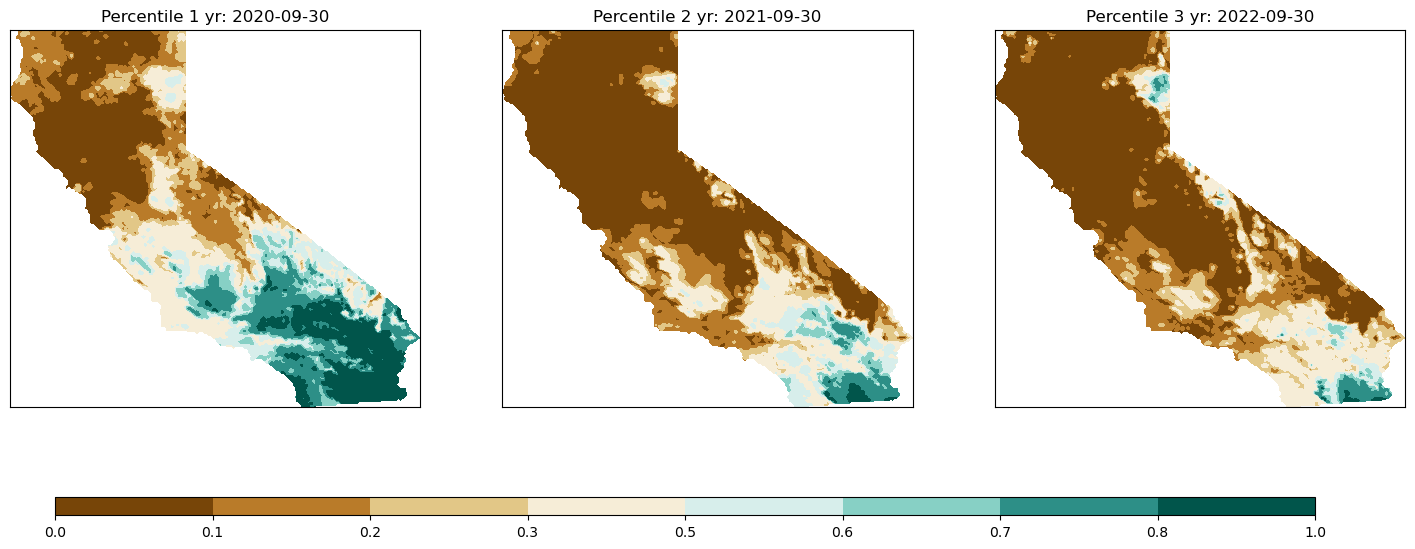

<Figure size 640x480 with 0 Axes>

In [18]:
variable_to_plot = ds_1yr.percentile.values
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define the indices for the slices
indices = [368, 380, 392]
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots

# Configure the colorbar scale to be between 0 and 1
# colors = ['red', 'orange', 'lightsalmon', 'yellow', 'lightgrey', 'gainsboro','whitesmoke', 'white']
colors = ['red', 'orange', 'lightsalmon', 'yellow', 'silver', 'lightgrey','gainsboro', 'whitesmoke']

# colors = ['red', 'orange', 'lightsalmon', 'yellow', 'lightgrey', 'lightgrey','lightgrey', 'lightgrey']

bounds = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]        
norm = BoundaryNorm(bounds, len(colors))
custom_cmap = ListedColormap(colors)
levels = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0]

cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 17))[1::2])

# Plot on the first subplot
img = axs[0].contourf(lon, lat, variable_to_plot_1yr[:, :, 368], cmap=cmap_discrete, levels=levels)
dates = ds_1yr.date.values
axs[0].set_title(f'Percentile 1 yr: {dates[368]}')
axs[0].set_aspect('equal')


# Plot on the second subplot
axs[1].contourf(lon, lat, variable_to_plot_2yr[:, :, 416], cmap=cmap_discrete, levels=levels)
dates = ds_2yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[1].set_title(f'Percentile 2 yr: {dates[416]}')
axs[1].set_aspect('equal')

# Plot on the third subplot
axs[2].contourf(lon, lat, variable_to_plot_3yr[:, :, 428], cmap=cmap_discrete, levels=levels)
dates = ds_3yr.date.values
dates = np.datetime_as_string(dates, unit='D')
axs[2].set_title(f'Percentile 3 yr: {dates[428]}')
axs[2].set_aspect('equal')

for ax in axs:
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=axs[0], orientation='horizontal', shrink=0.8, ticks=[0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0], cax=cbar_ax)

# fig.suptitle('Percentage of Average Precipitation')
plt.show()
plt.tight_layout()